<a href="https://colab.research.google.com/github/ganadaralabs/ComputerVision_Colab/blob/main/7%EA%B0%95_%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%B6%84%ED%95%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>**Colab Computer Vision Lecture 07** created by [Jooyeon Lee](http://leejooyeon.com/) | Check out other colab lectures on [GITHUB](https://github.com/ganadaralabs/ComputerVision_Colab)


#실습7_**이미지 분할**

##01 컨투어(Contour)

- **컨투어(Contour):** 이미지에서 같은 색상이나 밝기가 같은 연속된 점을 찾아 곡선으로 연결한 경계선
- 컨투어를 그리면 모양을 쉽게 인식하거나 분석할 수 있음
<img src="https://learnopencv.com/wp-content/uploads/2021/03/detecting-people-moving-object-detecton-using-contours-3.jpg" alt="img" height="200"/>
<img src="https://www.pyimagesearch.com/wp-content/uploads/2016/04/extreme_points_header.jpg" alt="img" height="200"/>

- 정확도를 위해 바이너리 이미지를 사용
  - 컨투어를 찾기 전에 스레시홀딩을 적용하거나 캐니 에지 검출을 사용 
- OpenCV에서 컨투어를 찾는 것은 까만 배경에서 하얀 객체를 찾는 것
  - 배경이 까맣고 전경이 하얀색이어야 함
  - 반대일 경우, 스레시홀딩 중 반전효과가 있는 THRESH_BINARY_INV를 적용해서 사용
  ![](https://opencv-python-tutroals.readthedocs.io/en/latest/_images/none.jpg)


**01.1 컨투어 찾기**
```
contours, hierarchy = cv2.findContours(src, mode, method, contours, hierarchy, offset)
```
**parameters:**
- **src:** 입력 영상, 검정과 흰색으로 구성된 바이너리 이미지
- **mode:** 컨투어 제공 방식 
 - cv2.RETR_EXTERNAL: 가장 바깥쪽 라인만 생성
 - cv2.RETR_LIST: 모든 라인을 계층 없이 생성
 - cv2.RET_CCOMP: 모든 라인을 2 계층으로 생성
 - cv2.RETR_TREE: 모든 라인의 모든 계층 정보를 트리 구조로 생성
- **method:** 근사 값 방식 
  - cv2.CHAIN_APPROX_NONE: 근사 없이 모든 좌표 제공
  - cv2.CHAIN_APPROX_SIMPLE: 컨투어 꼭짓점 좌표만 제공
  - cv2.CHAIN_APPROX_TC89_L1: Teh-Chin 알고리즘으로 좌표 개수 축소 
  - cv2. CHAIN_APPROX_TC89_KC0S: Teh-Chin 알고리즘으로 좌표 개수 축소
- **contours(optional):** 검출한 컨투어 좌표 (list type)
- **hierarchy(optional):** 컨투어 계층 정보 
  - Next, Prev, FirstChild, Parent
  - -1: 해당 없음
- **offset(optional):** ROI 등으로 인해 이동한 컨투어 좌표의 오프셋



**01.2 컨투어 그리기**
```
cv2.drawContours(img, contours, contourIdx, color, thickness)
```
**parameters:**
- **img:** 입력 영상
- **contours:** 그림 그릴 컨투어 배열 (cv2.findContours() 함수의 반환 결과를 전달)
- **contourIdx:** 그림 그릴 컨투어 인덱스
  - -1: 모든 컨투어 표시
- **color:** 색상 값
- **thickness:** 선 두께
  - 0: 채우기

In [3]:
#구글 드라이브 마운트 하기
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


[도형의 갯수] Contour:12


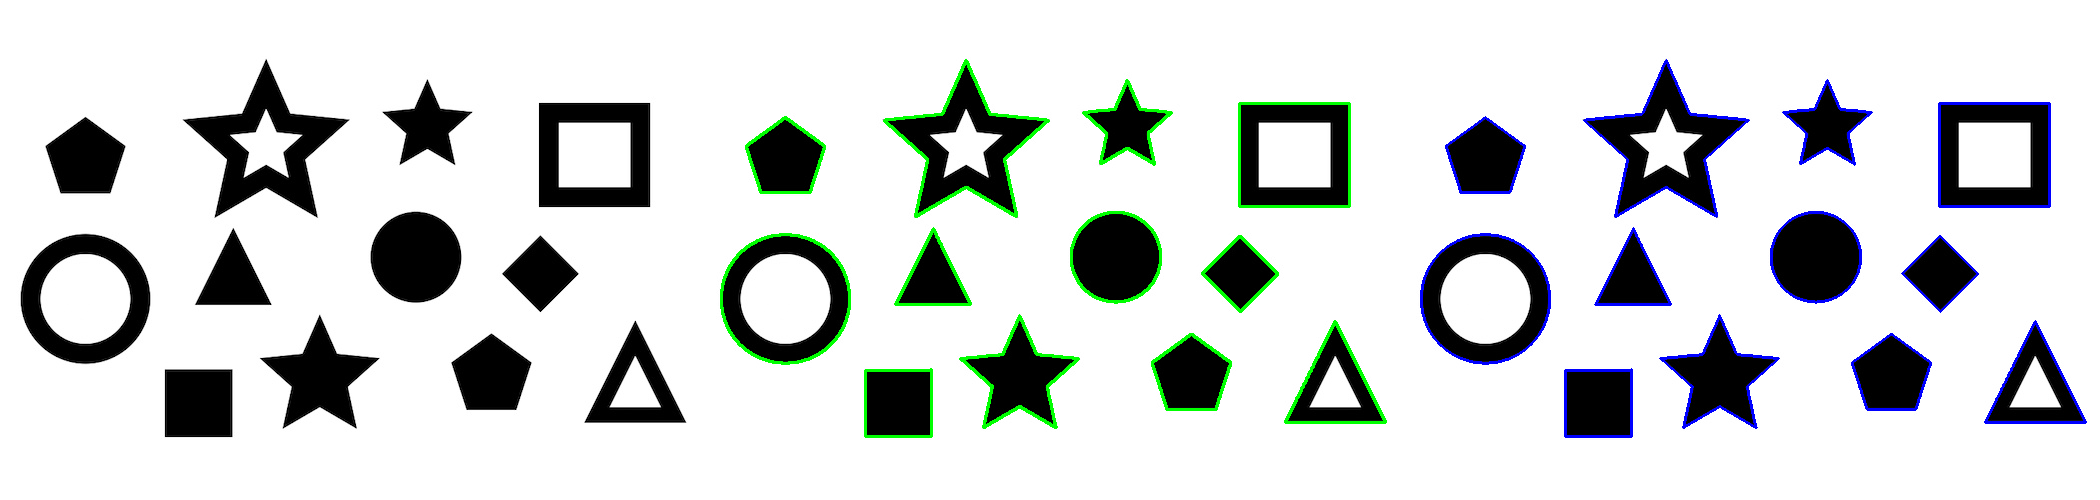

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 


srcimg = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/shapes/shapes.jpg')
#srcimg = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/shapes/shapes_inv.jpg')

img1 = srcimg.copy()
img2 = srcimg.copy()

grayimg = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
ret, imthres = cv2.threshold(grayimg, 127, 255, cv2.THRESH_BINARY_INV)


# 가장 바깥쪽 컨투어에 대해 파이썬 리스트 형태로 모든 좌표 반환: cv2.CHAIN_APPROX_NONE
contour, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(img1, contour, -1, (0,255,0), 2)


# 컨투어 모든 좌표를 파랑색 원으로 그리기
for i in contour:
    for j in i:
        cv2.circle(img2, tuple(j[0]), 1, (255,0,0), -1) 


# 각각의 컨투의 갯수 출력
print('[도형의 갯수] Contour:%d'% (len(contour)))

image_frame = np.hstack([srcimg,img1,img2])
cv2_imshow(image_frame)

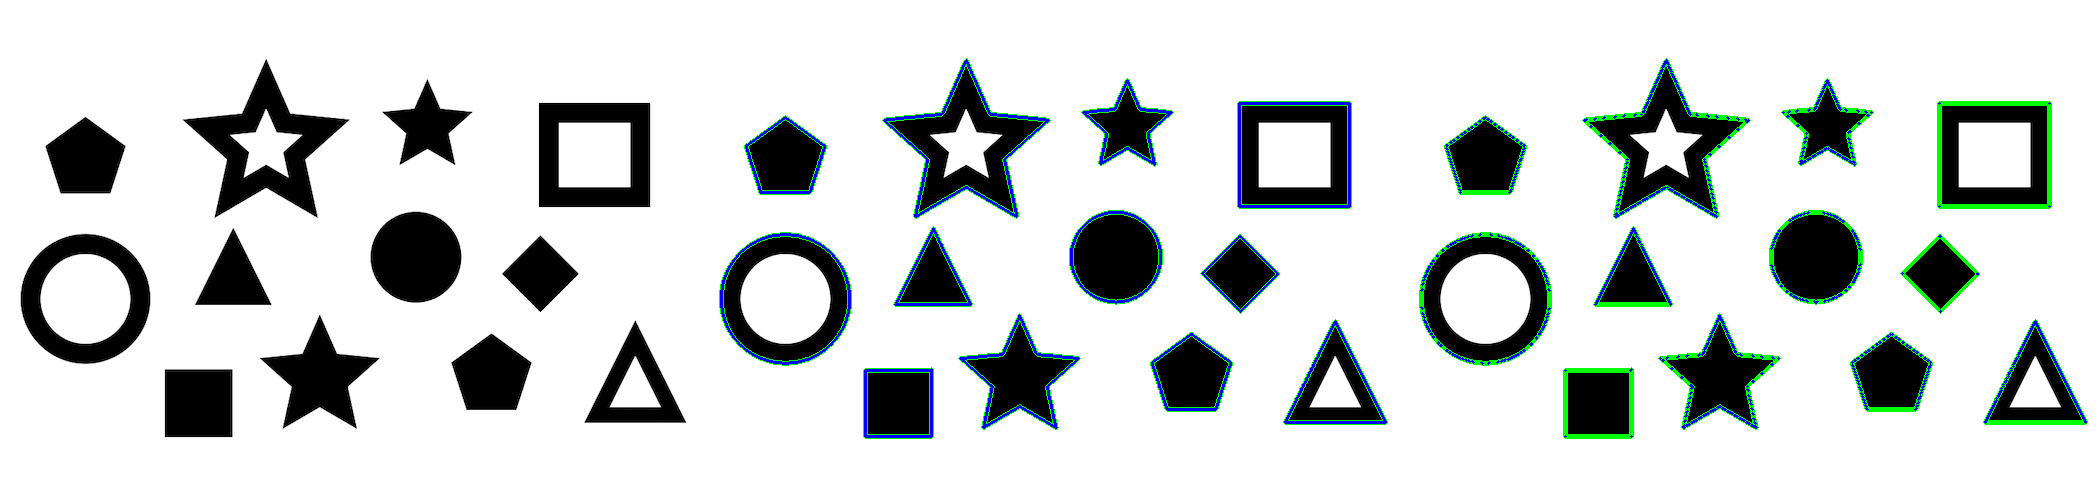

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 


srcimg = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/shapes/shapes.jpg')
#srcimg = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/shapes/shapes_inv.jpg')
img1 = srcimg.copy()
img2 = srcimg.copy()

grayimg = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
ret, imthres = cv2.threshold(grayimg, 127, 255, cv2.THRESH_BINARY_INV)


# 가장 바깥쪽 컨투어에 대해 파이썬 리스트 형태로 모든 좌표 반환: cv2.CHAIN_APPROX_NONE
contour1, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(img1, contour1, -1, (0,255,0), 4)
for i in contour1:
    for j in i:
        cv2.circle(img1, tuple(j[0]), 1, (255,0,0), -1) 


# 가장 바깥쪽 컨투어에 대해 꼭지점 좌표만 반환: cv2.CHAIN_APPROX_SIMPLE
contour2, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img2, contour2, -1, (0,255,0), 4)
for i in contour2:
    for j in i:
        cv2.circle(img2, tuple(j[0]), 1, (255,0,0), -1) 


image_frame = np.hstack([srcimg,img1,img2])
cv2_imshow(image_frame)

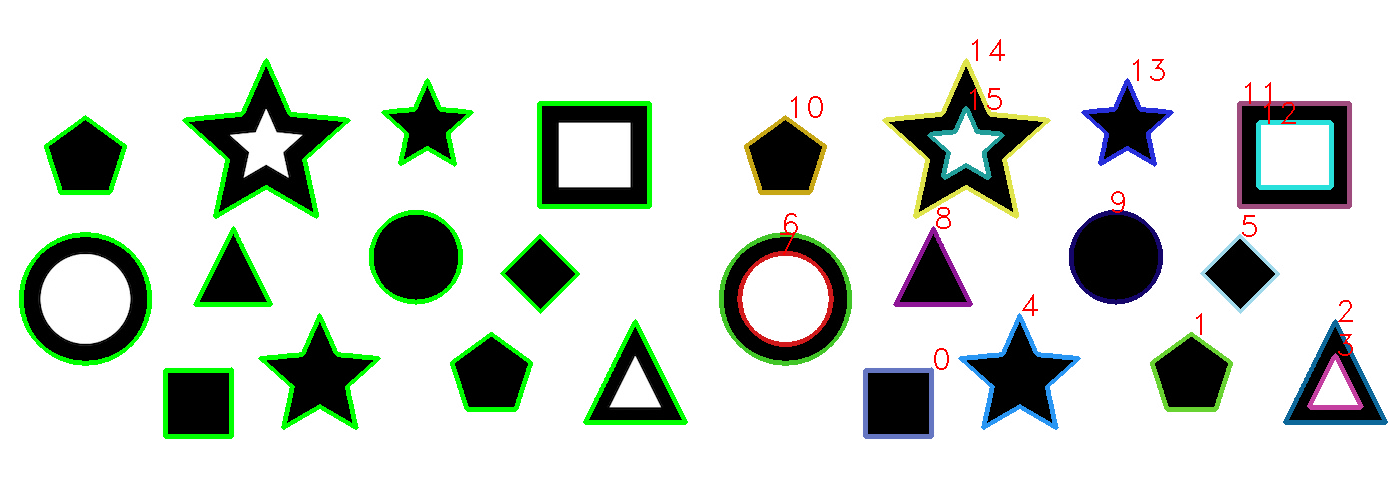

12 [Next, Prev, First Child, Parent]
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [10  8 -1 -1]
  [11  9 -1 -1]
  [-1 10 -1 -1]]]
16 [Next, Prev, First Child, Parent]
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 4  1  3 -1]
  [-1 -1 -1  2]
  [ 5  2 -1 -1]
  [ 6  4 -1 -1]
  [ 8  5  7 -1]
  [-1 -1 -1  6]
  [ 9  6 -1 -1]
  [10  8 -1 -1]
  [11  9 -1 -1]
  [13 10 12 -1]
  [-1 -1 -1 11]
  [14 11 -1 -1]
  [-1 13 15 -1]
  [-1 -1 -1 14]]]


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 

srcimg = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/shapes/shapes.jpg')
#srcimg = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/shapes/shapes_inv.jpg')
img1 = srcimg.copy()
img2 = srcimg.copy()

imgray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
ret, imthres = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY_INV)

# img1
# 가장 바깥 컨투어만 수집: cv2.RETR_EXTERNAL
contour1, hierarchy1 = cv2.findContours(imthres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# 가장 바깥 컨투어만 그리고 이미지 출력
cv2.drawContours(img1, contour1, -1, (0,255,0), 3)

# img2
# 모든 컨투어를 트리 계층으로 수집: cv2.RETR_TREE 
contour2, hierarchy2 = cv2.findContours(imthres, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for idx, cont in enumerate(contour2): 
    # 랜덤한 컬러 추출
    color = [int(i) for i in np.random.randint(0,255, 3)]
    # 컨투어 인덱스 마다 랜덤한 색상 지정
    cv2.drawContours(img2, contour2, idx, color, 3)
    # 컨투어 첫 좌표에 인덱스 숫자 표시
    cv2.putText(img2, str(idx), tuple(cont[0][0]), cv2.FONT_HERSHEY_DUPLEX, 1, (0,0,255))

image_frame = np.hstack([img1,img2])
cv2_imshow(image_frame)

print(len(contour1),"[Next, Prev, First Child, Parent]") 
print(hierarchy1)
print(len(contour2),"[Next, Prev, First Child, Parent]")  
print(hierarchy2)

**01.3 컨투어를 다양한 도형으로 감싸기**

1. 좌표를 감싸는 사각형 반환
```
 x, y, w, h = cv2.boundingRect(contour)
```
  **parameters:**
  - x, y: 사각형의 왼쪽 상단 좌표
  - w, h: 사각형의 폭과 높이

<br>

2. 좌표를 감싸는 최소한의 사각형 계산
```
rotateRect = cv2.minAreaRect(contour)
```
  **parameters:**
  - rotateRect: 회전한 사각형 좌표
    - center: 중심점(x,y)
    - size: 크기(w,h)
    - angle: 회전 각(양수: 시계 방향, 음수: 반시계 방향)

<br>

3. rotateRect로부터 꼭짓점 좌표 계산
```
vertex = cv2.boxPoints(rotateRect)
```
 **parameters:**
  - vertex: 4개의 꼭짓점 좌표, 소수점 포함이므로 정수 변환 필요

<br>

4. 좌표를 감싸는 최소한의 동그라미 계산
```
center, radius = cv2.minEnclosingCircle(contour)
```
  **parameters:**
  - center: 원점 좌표(x, y), 튜플
  - radius: 반지름

<br>

5. 좌표를 감싸는 최소한의 삼각형 게산
```
area, triangle = cv2.minEnclosingTriangle(points)
```
  **parameters:**
  - area: 넓이
  - triangle: 3개의 꼭짓점 좌표

<br>

6. 좌표를 감싸는 최소한의 타원 계산
```
ellipse = cv2.fitEllipse(points)
```
  **parameters:**
  - ellipse
    - center: 원점 좌표(x,y), 튜플
    - axes: 축의 길이(x축, y축), 튜플
    - angle: 화전 각도

<br>

7. 중심점을 통과하는 직선 계산
```
line = cv2.fitLine(points, distType, param, reps, aeps, line)
```
  **parameters:**
  - distType: 거리 계산 방식 
    - cv2.DIST_L2, cv2.DIST_L1, cv2.DIST_L12, cv2.DIST_FAIR, cv2.DIST_WELSCH, cv2.DIST_HUBER
  - param: distType에 전달할 인자, 0 = 최적 값 선택
  - reps: 반지름 정확도, 선과 원본 좌표의 거리, 0.01 권장
  - aeps: 각도 정확도, 0.01 권장
  - line(optional): vx, vy 정규화된 단위 벡터, x0, y0: 중심점 좌표

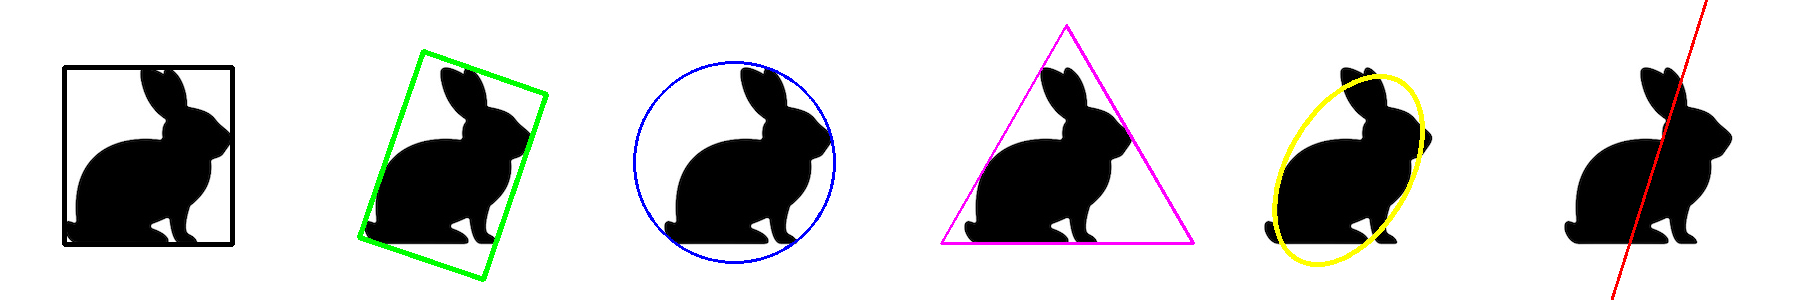

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 

srcimg = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/shapes/rabbitshape.jpg')
#srcimg = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/shapes/carrotshape.jpg')
#srcimg = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/shapes/starshape.jpg')

img1 = srcimg.copy()
img2 = srcimg.copy()
img3 = srcimg.copy()
img4 = srcimg.copy()
img5 = srcimg.copy()
img6 = srcimg.copy()

imgray = cv2.cvtColor(srcimg, cv2.COLOR_BGR2GRAY)
ret, cntr_threshold = cv2.threshold(imgray, 127,255,cv2.THRESH_BINARY_INV)

# 컨투어 찾기
contours, hr = cv2.findContours(cntr_threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour = contours[0]

# 감싸는 사각형 표시(검정색)
x,y,w,h = cv2.boundingRect(contour)
cv2.rectangle(img1, (x,y), (x+w, y+h), (0,0,0), 3)

# 최소한의 사각형 표시(초록색)
rect = cv2.minAreaRect(contour)
box = cv2.boxPoints(rect)   # 중심점과 각도를 4개의 꼭지점 좌표로 변환
box = np.int0(box)          # 정수로 변환
cv2.drawContours(img2, [box], -1, (0,255,0), 3)

# 최소한의 원 표시(파랑색)
(x,y), radius = cv2.minEnclosingCircle(contour)
cv2.circle(img3, (int(x), int(y)), int(radius), (255,0,0), 2)

# 최소한의 삼각형 표시(분홍색)
ret, tri = cv2.minEnclosingTriangle(contour)
cv2.polylines(img4, [np.int32(tri)], True, (255,0,255), 2)

# 최소한의 타원 표시(노랑색)
ellipse = cv2.fitEllipse(contour)
cv2.ellipse(img5, ellipse, (0,255,255), 3)

# 중심점 통과하는 직선 표시(빨강색)
[vx,vy,x,y] = cv2.fitLine(contour, cv2.DIST_L2,0,0.01,0.01)
cols,rows = img6.shape[:2]
cv2.line(img6,(0, 0-x*(vy/vx) + y), (cols-1, (cols-x)*(vy/vx) + y), (0,0,255),2)

image_frame = np.hstack([img1,img2,img3,img4,img5,img6])
cv2_imshow(image_frame)

##02 이미지 모멘트(Moment)

- **모멘트(Moment):** 물리학에서 힘의 양을 기술할 때 표현하지만 컴퓨터 비전에서는 이미지의 양적인 속성 표현
 <br>
 <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/66e11e03b979350e397c09cae989dbe0863bef13" alt="img" height="80"/>

  - 컨투어가 둘러싸는 영역의 x,y 좌표의 픽셀 값과 좌표 인덱스의 i,j차수를 곱한 것의 합
  - $M_{(0,0)}$는 $f(x,y)x^0y^0$을 표기  (=컨투어 면적 넓이, moment['m00'])
    - 바이너리 이미지이기 때문에 0이 아닌 모든 픽셀 값을 1로 계산 
    - i,j 차수는 0~3
  - cv2.moments()함수는 다양한 모멘트 값을 딕셔너리 형식으로 반환
  ```
  moment = cv2.moments(contour)
  ```
    - 차수를 바꿔가며 모멘트를 계산하면 다양한 값을 얻을 수 있음
    - 무게 중심이나 물체의 넓이, 둘레 길이 등을 구할 때 유용
      
      #모멘트를 사용해 중심점 구하기
      ```
      M = cv2.moments(contour)
      cx = int(M['m10']/M['m00'])
      cy = int(M['m01']/M['m00'])
      ```





  참고: [위키피디아 모먼트 ](https://en.wikipedia.org/wiki/Image_moment)



**02.1 컨투어와 모멘트로 넓이와 둘레 계산**



```
area = cv2.contourArea(contour) = moment['m00']
```

```
perimeter = cv2.arcLength(contour,option)
```
**parameters:**
- option 
  - True: 폐곡선(closed curve) 도형을 만들어 둘레길이를 구함
  - False: 시작점과 끝점을 연결하지 않고 둘레 길이 구함









Index 0 area:51018
Index 1 area:64770
Index 2 area:25758
Index 3 area:64770
Index 4 area:35605


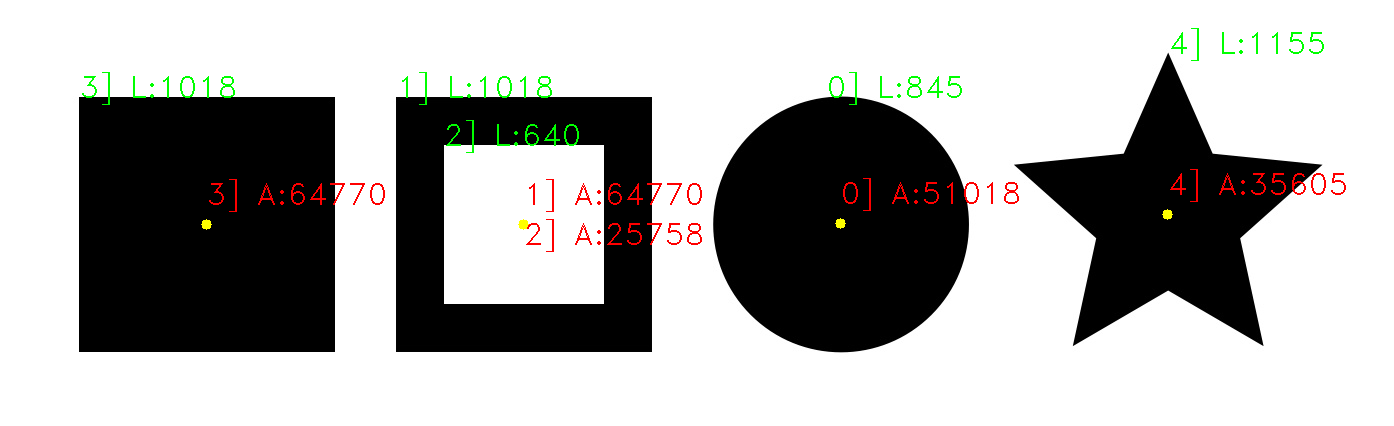

In [40]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/shapes/4shapes.jpg')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, imthres = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY_INV)
#contours, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours, hierarchy = cv2.findContours(imthres, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for idx, contour in enumerate(contours): 
  moment = cv2.moments(contour)
  #중심점 찾기
  cx = int(moment['m10']/moment['m00'])
  cy = int(moment['m01']/moment['m00'])
  #영역 넓이
  area = moment['m00']
  length = cv2.arcLength(contour,True)
  cv2.circle(img,(cx,cy),5,(0,255,255),-1)
  cv2.putText(img,"{}] L:{:.0f}".format(idx,length), tuple(contour[0][0]), cv2.FONT_HERSHEY_DUPLEX,1,(0,255,0))
  
  #종속관계 확인 후 넓이와 둘레길이 표기
  pIdx = hierarchy[0][idx][3] 
  pMoment = cv2.moments(contours[pIdx]) 
  pcy = int(pMoment['m01']/pMoment['m00'])

  if (pIdx != -1) and (pcy == cy):
    cv2.putText(img,"{}] A:{:.0f}".format(idx,area),(cx,cy+20), cv2.FONT_HERSHEY_DUPLEX,1,(0,0,255))
  else:
    cv2.putText(img,"{}] A:{:.0f}".format(idx,area),(cx,cy-20), cv2.FONT_HERSHEY_DUPLEX,1,(0,0,255)) 

  print("Index {} area:{:.0f}".format(idx, cv2.contourArea(contour)))


cv2_imshow(img)

**02.2 컨투어 단순화I**




```
approx = cv2.approxPolyDP(contour, epsilon, closed)
```
**parameters:**

- contour: 대상 컨투어 좌표
- epsilon: 근사 값 정확도, 오차 범위 (maximum distance from contour to approximated contour)
  - epsilon = 0.05*cv2.arcLength(cnt,True) = 둘레길이의 5%
- closed: 컨투어의 닫힘 여부 (True/False)
- approx: 근사 계산한 컨투어 좌표

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 

img1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/shapes/randomshape.jpg')
img2 = img1.copy()
img3 = img1.copy()

# 그레이스케일과 바이너리 스케일 변환
imgray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) 
ret, th = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY)

# 컨투어 찾기
contours, hierachy = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour = contours[0]

# 전체 둘레의 0.05로 오차 범위 지정
epsilon1 = 0.05 * cv2.arcLength(contour, True)
approx1 = cv2.approxPolyDP(contour, epsilon1, True)

# 전체 둘레의 0.09로 오차 범위 지정
epsilon2 = 0.09 * cv2.arcLength(contour, True)
approx2 = cv2.approxPolyDP(contour, epsilon2, True)


# 각각 컨투어 선 그리기
cv2.drawContours(img1, [contour], -1, (0,255,0), 3)
cv2.drawContours(img2, [approx1], -1, (0,255,0), 3)
cv2.drawContours(img3, [approx2], -1, (0,255,0), 3)

image_frame = np.hstack([img1,img2,img3])
cv2_imshow(image_frame)


**02.3 컨투어 단순화II**


- 볼록 선체(convex hull): 어느 한 부분도 오목하지 않은 도형
- 볼록 선체는 대상을 완전히 포함하는 외곽 영역을 찾는데 유용

<br>

1. 볼록 선체 계산
  ```
  hull = cv2.convexHull(points, hull, clockwise, returnPoints)
  ```
  **parameters:**
  - points: 입력 컨투어
  - hull(optional): 볼록 선체 결과
  - clockwise(optional): 방향 지정 (True: 시계 방향)
  - returnPoints(optional): 결과 좌표 형식 선택 
    - (True: 볼록 선체 좌표 변환, False: 입력 컨투어 중에 볼록 선체에 해당하는 인덱스 반환)

<br>

2. 볼록 선체 만족 여부 확인
  ```
  retval = cv2.isContourConvex(contour)
  ```
  **parameters:**
  - retval: True인 경우 볼록 선체임

<br>

3. 볼록 선체 결함 찾기
  ```
  defects = cv2.convexityDefects(contour, convexhull)
  ```
  **parameters:**
  - contour: 입력 컨투어
  - convexhull: 볼록 선체에 해당하는 컨투어의 인덱스
  - defects: 볼록 선체 결함이 있는 컨투어의 배열 인덱스, N x 1 x 4 배열, [starts, end, farthest, distance]
    - start: 오목한 각이 시작되는 컨투어의 인덱스
    - end: 오목한 각이 끝나는 컨투어의 인덱스
    - farthest: 볼록 선체에서 가장 먼 오목한 지점의 컨투어 인덱스
    - distance: farthest와 볼록 선체와의 거리


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 

img1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/shapes/starshape.jpg')
#img1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/shapes/rabbitshape.jpg')
#img1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/shapes/carrotshape.jpg')
img2 = img1.copy()

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
ret, th = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
contours, heiarchy = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cntr = contours[0]
cv2.drawContours(img1, [cntr], -1, (0, 255,0), 1)

# 볼록 선체 찾기(좌표 기준)와 그리기
hull = cv2.convexHull(cntr)
cv2.drawContours(img2, [hull], -1, (0,255,0), 1)
# 볼록 선체 만족 여부 확인
print(cv2.isContourConvex(cntr), cv2.isContourConvex(hull))

# 볼록 선체 찾기(인덱스 기준)
hull2 = cv2.convexHull(cntr, returnPoints=False)
# 볼록 선체 결함 찾기
defects = cv2.convexityDefects(cntr, hull2)
# 볼록 선체 결함 순회
for i in range(defects.shape[0]):
    # 시작, 종료, 가장 먼 지점, 거리
    startP, endP, farthestP, distance = defects[i, 0]
    # 가장 먼 지점의 좌표 구하기
    farthest = tuple(cntr[farthestP][0])
    # 거리를 부동 소수점으로 변환
    dist = distance/256.0
    # 거리가 1보다 큰 경우
    if dist > 1 :
        # 빨강색 점 표시 
        cv2.circle(img2, farthest, 3, (0,0,255), -1)

image_frame = np.hstack([img1,img2])
cv2_imshow(image_frame)


**02.4 컨투어와 도형매칭**

- 서로 다른 물체의 컨투어를 비교해 두 물체가 얼마나 비슷한지 추정 

<br>

두 개의 컨투어로 도형 매칭
```
retval = cv2.matchShapes(contour1, contour2, method, parameter)
```
**parameters:**
- contour1, contour2: 비교할 두 개의 컨투어
- method: 휴 모멘트 비교 알고리즘 선택 플래그 
  - cv2.CONTOURS_MATCH_I1, cv2.CONTOURS_MATCH_I2, cv2.CONTOURS_MATCH_I3
- parameter: 알고리즘에 전달을 위한 예비 인수로 0으로 고정
- retval: 두 도형의 닮은 정도 (0=동일, 숫자가 클수록 다름)

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 


# 매칭을 위한 이미지 읽기
#target = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/shapes/circleshape.jpg') # 매칭 대상
#target = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/shapes/starshape.jpg') # 매칭 대상
target = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/shapes/pentashape.jpg') # 매칭 대상

shapes = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/shapes/shapes.jpg') # 여러 도형


targetGray = cv2.cvtColor(target, cv2.COLOR_BGR2GRAY)
shapesGray = cv2.cvtColor(shapes, cv2.COLOR_BGR2GRAY)

ret, targetTh = cv2.threshold(targetGray, 127, 255, cv2.THRESH_BINARY_INV)
ret, shapesTh = cv2.threshold(shapesGray, 127, 255, cv2.THRESH_BINARY_INV)


cntrs_target, _ = cv2.findContours(targetTh, cv2.RETR_EXTERNAL, \
                                            cv2.CHAIN_APPROX_SIMPLE)
cntrs_shapes, _ = cv2.findContours(shapesTh, cv2.RETR_EXTERNAL, \
                                            cv2.CHAIN_APPROX_SIMPLE)


matchs = [] # 컨투어와 매칭 점수를 보관할 리스트
for contr in cntrs_shapes:
    # 대상 도형과 여러 도형 중 하나와 매칭 실행 
    match = cv2.matchShapes(cntrs_target[0], contr, cv2.CONTOURS_MATCH_I2, 0.0)
    # 해당 도형의 매칭 점수와 컨투어를 쌍으로 저장
    matchs.append( (match, contr) )
    # 해당 도형의 컨투어 시작지점에 매칭 점수 표시 
    cv2.putText(shapes, '%.2f'%match, tuple(contr[0][0]), cv2.FONT_HERSHEY_PLAIN, 1,(0,0,255),1 )

# 매칭 점수로 정렬
matchs.sort(key=lambda x : x[0])
# 가장 적은 매칭 점수를 얻는 도형의 컨투어에 선 그리기 
cv2.drawContours(shapes, [matchs[0][1]], -1, (0,255,0), 3)
cv2_imshow(target)
cv2_imshow(shapes)

##03 허프변환

- 이미지에서 직선과 원같이 간단한 모양을 식별하는 가장 유명한 방법 
- 이미지의 형태를 찾거나, 누락되거나 깨진 영역을 복원할 때 사용


- **허프 선 변환 방법**
  - 이미지의 수많은 픽셀 중 서로 직선 관계를 갖는 픽셀들만 골라내는 직선 검출 알고리즘
  - 직선의 방적식 `y=mx+c`은 삼각함수를 사용해 `r = 𝑥 cos 𝜃 + 𝑦 sin 𝜃`로 표현
    - xy 좌표계상에 존재하는 점들을 극 좌표계상의 직선으로 변환
    - 각각의 점에 다양한 직선을 그었을 때 좌표 원점에서 직선까지 직교하는 수선의 각도와 길이를 측정
    - 아래 그림에서 60도의 직선까지의 수선의 길이가 제일 비슷 

      <img src="https://upload.wikimedia.org/wikipedia/commons/e/e6/R_theta_line.GIF" alt="img" height="200"/>

      <img src="https://upload.wikimedia.org/wikipedia/commons/2/28/Hough_transform_diagram.svg" alt="img" height="400"/>



**03.1 허프 선 변환**

```
cv2.HoughLines(image, rho, theta, threshold)
```
**parameters:**
- **image:** 8bit, single-channel binary image, canny edge를 선 적용.
-**rho:** r 값의 범위 (0 ~ 1 실수)
-**theta:** 𝜃 값의 범위(0 ~ 180 정수)
-**threshold:** 만나는 점의 기준, 숫자가 작으면 많은 선이 검출되지만 정확도가 떨어지고, 숫자가 크면 정확도가 올라감.




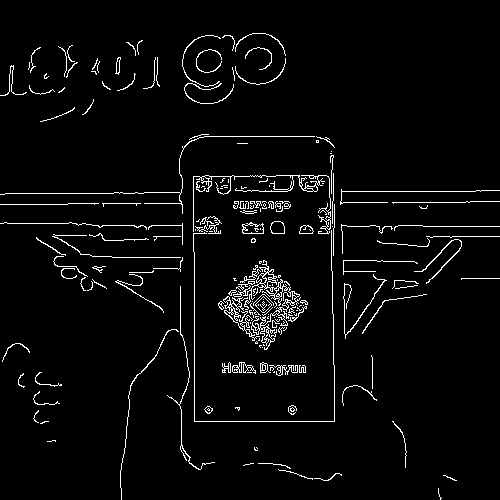

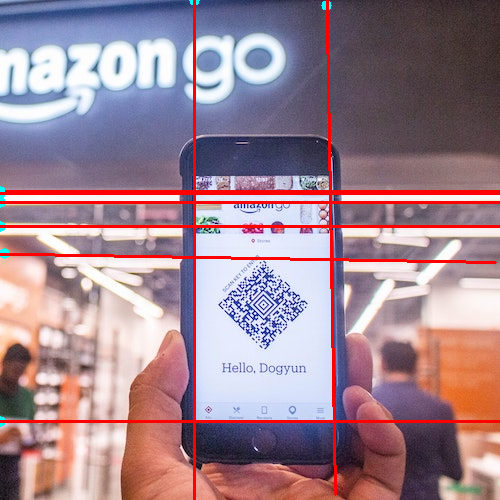

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 


img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/QRcellphone.jpg')

img2 = img.copy()

height, width = img.shape[:2]

imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(imgray, 250, 400)
cv2_imshow(edges)

# 허프 선 검출, 직선으로 판단할 최소한의 점은 130개로 지정
lines = cv2.HoughLines(edges, 1, np.pi/180, 130)

for line in lines: # 검출된 모든 선 
  for rho, theta in line:
    tx, ty = np.cos(theta), np.sin(theta) # x,y축에 대한 삼각비
    x0, y0 = tx*rho, ty*rho  #x, y 기준(절편) 좌표
    
    # 기준 좌표에 점 그리기
    cv2.circle(img2, (abs(x0), abs(y0)), 5, (255,255,0), -1)
    
    # 직선 방정식으로 그리기 위한 시작점, 끝점 계산
    x1, y1 = int(x0 + width*(-ty)), int(y0 + height * tx)
    x2, y2 = int(x0 - width*(-ty)), int(y0 - height * tx)
    
    # 선그리기
    cv2.line(img2, (x1, y1), (x2, y2), (0,0,255), 2)

cv2_imshow(img2)


**03.2 확률 허프 선 변환**

```
cv2.HoughLinesP(image, rho, theta, threshold, minLineLength, maxLineGap)
```
**parameters:**
- **image:** 8bit, single-channel binary image, canny edge를 선 적용.
-**rho:** r 값의 범위 (0 ~ 1 실수)
-**theta:** 𝜃 값의 범위(0 ~ 180 정수)
-**threshold:** 만나는 점의 기준, 숫자가 작으면 많은 선이 검출되지만 정확도가 떨어지고, 숫자가 크면 정확도가 올라감.
- **minLineLength** – 선의 최소 길이. 이 값보다 작으면 reject.
- **maxLineGap** – 선과 선사이의 최대 허용간격. 이 값보다 작으며 reject.




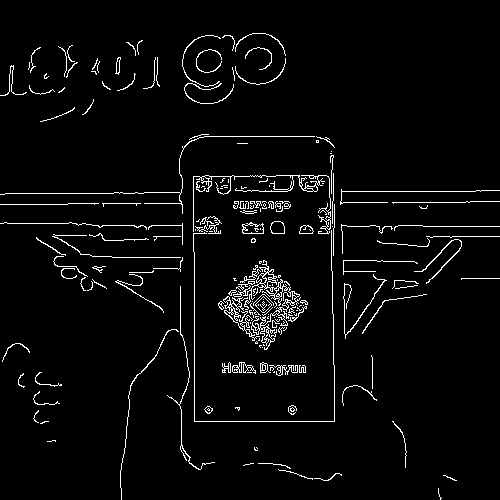

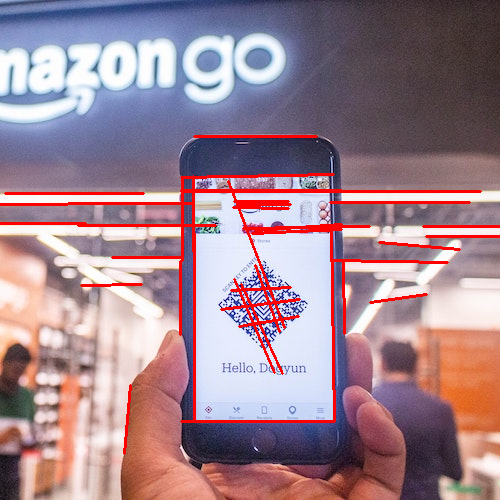

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/QRcellphone.jpg')
img2 = img.copy()

# 그레이 스케일로 변환 및 캐니 엣지 검출
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(imgray, 250, 400)
cv2_imshow(edges)

rho = 1
theta = np.pi/180
threshold = 60
min_line_length = 50
max_line_gap = 20


# 확율 허프 변환 적용
lines = cv2.HoughLinesP(edges, rho, theta, threshold, None, min_line_length, max_line_gap)

for line in lines:
    # 검출된 선 그리기
    for x1,y1,x2,y2 in line:
        cv2.line(img2,(x1,y1),(x2,y2),(0,0,255),2)

cv2_imshow(img2)

**03.3 허프 원 변환**

```
cv2.HoughCircles(image, method, dp, minDist)
```
**parameters:**


- **image:** 8-bit single-channel image. grayscale image.
- **method:** 검출 방법. HOUGH_GRADIENT 사용.
- **dp:** dp=1이면 Input Image와 동일한 해상도.
- **minDist:** 검출한 원의 중심과의 최소거리. 값이 작으면 원이 아닌 것들도 검출이 되고, 너무 크면 원을 놓칠 수 있음.
- **minRadius:** 원의 최소 반지름.
- **maxRadius:** 원의 최대 반지름.



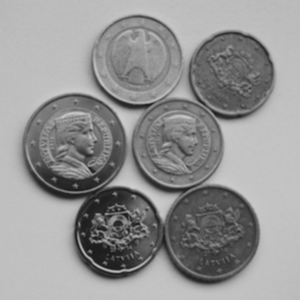

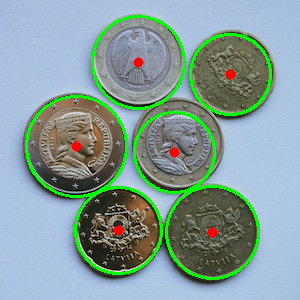

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 

#img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/coins600x300.jpg')
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/coins300x300.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 노이즈 제거를 위한 가우시안 블러
blurimg = cv2.GaussianBlur(gray, (3,3), 0)
cv2_imshow(blurimg)

dp = 1
minDist = 20

circles = cv2.HoughCircles(blurimg, cv2.HOUGH_GRADIENT, dp, minDist, minRadius=10, maxRadius=100)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        # 원 둘레에 초록색 원 그리기
        cv2.circle(img,(i[0], i[1]), i[2], (0, 255, 0), 2)
        # 원 중심점에 빨강색 원 그리기
        cv2.circle(img, (i[0], i[1]), 2, (0,0,255), 6)

# 결과 출력
cv2_imshow(img)

##04 연속 영역 분할

실생활에서 찍은 사진은 컨투어가 분명하지 않거나 잘리는 경우가 많기 때문에 연속된 영역을 찾아 분할하는 방법도 필요함

**04.1 거리 변환(Distance Transformation)**




```
distanceTransform(src, dst, distanceType, maskSize)
```
**parameters:**
- **src:** 입력 영상, 바이너리 스케일
- **distanceType:** 거리 계산 방식 
  - cv2.DIST_L2, cv2.DIST_L1, cv2.DIST_L12, cv2.DIST_FAIR, cv2.DIST_WELSCH, cv2.DIST_HUBER
- **maskSize:** 거리 변환 커널 크기



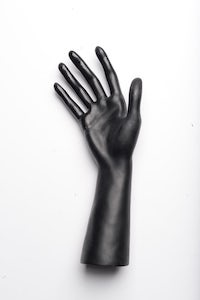

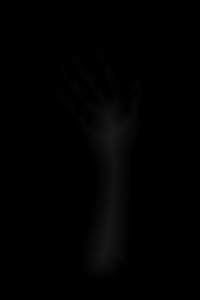

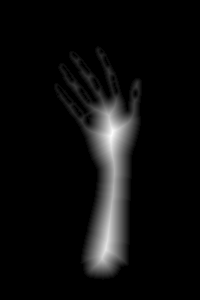

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 

#img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/shapes/4shapes.jpg')
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/hand.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

dist_transform = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)

# dist_transform 함수를 사용하면 실수 타입(float32)의 이미지가 생성
#normalize 함수를 사용
result = cv2.normalize(dist_transform, None, 255, 0, cv2.NORM_MINMAX, cv2.CV_8UC1)

cv2_imshow(img)
cv2_imshow(dist_transform)
cv2_imshow(result)

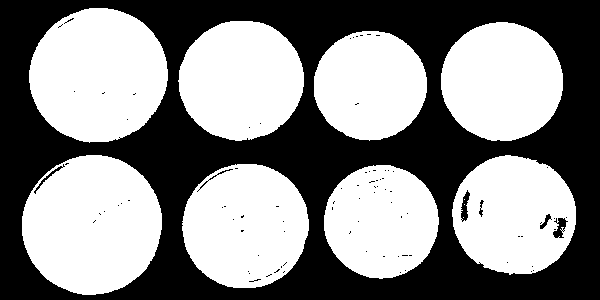

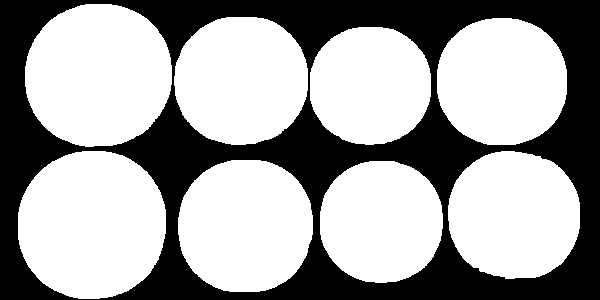

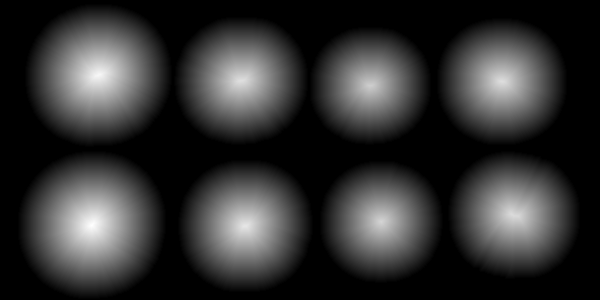

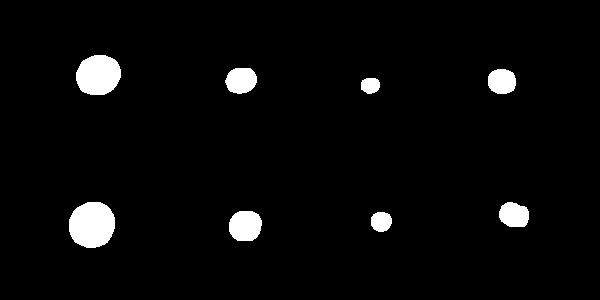

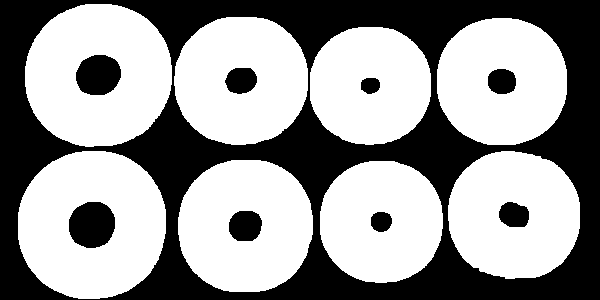

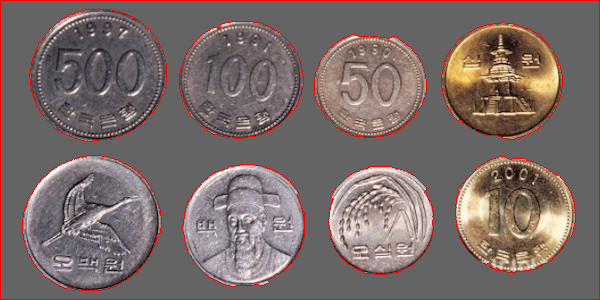

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/coins600x300.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,240,255,cv2.THRESH_BINARY_INV)
cv2_imshow(thresh)


#모폴로지를 사용해 노이즈나 구멍제거
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
sure_bg = cv2.dilate(thresh, kernel)
cv2_imshow(sure_bg)

#동전 중앙 부분을 검출하기 위해서 distance transform를 적용
dist_transform = cv2.distanceTransform(sure_bg, cv2.DIST_L2, 5)
result_dist_transform = cv2.normalize(dist_transform, None, 255, 0, cv2.NORM_MINMAX, cv2.CV_8UC1)
cv2_imshow(result_dist_transform)
# 이진화 스레시홀딩 적용
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(),255, cv2.THRESH_BINARY)
cv2_imshow(sure_fg)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
cv2_imshow(unknown)

# 마커 라벨링
ret, markers = cv2.connectedComponents(sure_fg)

# 확실한 배경이 1이 되도록 모든 라벨에 1을 더함
markers = markers+1

# 확실하지 않은 구간을 0으로 처리
markers[unknown==255] = 0

markers = cv2.watershed(img, markers)

img[markers == -1] = [0, 0, 255]
img[markers == 1] = [100, 100, 100]

cv2_imshow(img)

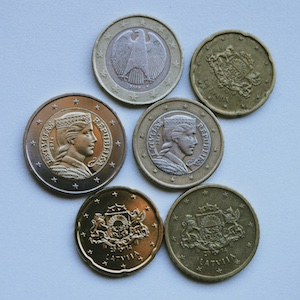

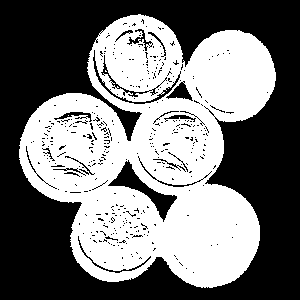

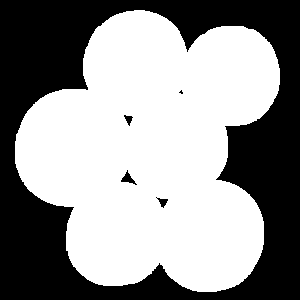

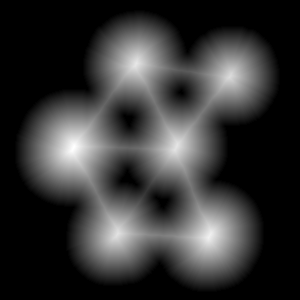

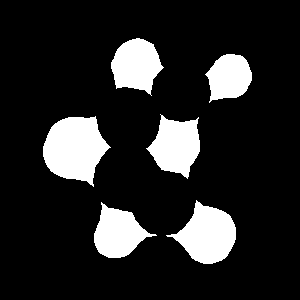

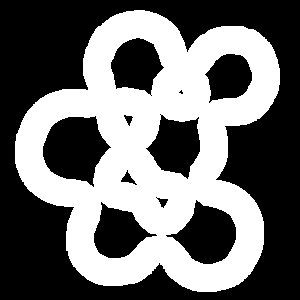

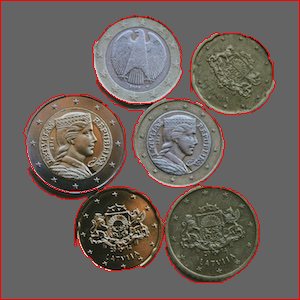

In [52]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/coins300x300.jpg')
cv2_imshow(img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,160,255,cv2.THRESH_BINARY_INV)
cv2_imshow(thresh)


#모폴로지를 사용해 노이즈나 구멍제거
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
sure_bg = cv2.dilate(thresh, kernel)
cv2_imshow(sure_bg)

#동전 중앙 부분을 검출하기 위해서 distance transform를 적용
dist_transform = cv2.distanceTransform(sure_bg, cv2.DIST_L2, 5)
result_dist_transform = cv2.normalize(dist_transform, None, 255, 0, cv2.NORM_MINMAX, cv2.CV_8UC1)
cv2_imshow(result_dist_transform)

# 이진화 스레시홀딩 적용
ret, sure_fg = cv2.threshold(dist_transform, 0.5*dist_transform.max(),255, cv2.THRESH_BINARY)
cv2_imshow(sure_fg)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
cv2_imshow(unknown)

# 마커 라벨링
ret, markers = cv2.connectedComponents(sure_fg)

# 확실한 배경이 1이 되도록 모든 라벨에 1을 더함
markers = markers+1

# 확실하지 않은 구간을 0으로 처리
markers[unknown==255] = 0

markers = cv2.watershed(img, markers)

img[markers == -1] = [0, 0, 255]
img[markers == 1] = [100, 100, 100]

cv2_imshow(img)